### Requirements
---

In [1]:
import matplotlib
matplotlib.__version__

'3.9.0'

In [2]:
import pandas as pd
pd.__version__

'1.5.3'

### Tips and Tricks
---

  - **Normalization:** 
> Normalization / Scaling (often used interchangeably with standardization) is used to transform the actual values of numeric variables in a way that provides helpful properties for machine learning. Many algorithms such as Logistic Regression, Support Vector Machine, K Nearest Neighbors and Naive Bayes assume that all features are centered around zero and have variances that are at at the same level of order. If a particular feature in a dataset has a variance that is larger in order of magnitude than other features, the model may not understand all features correctly and could perform poorly.

  - **Transformation:** 
> While normalization transforms the range of data to remove the impact of magnitude in variance, transformation is a more radical technique as it changes the shape of the distribution so that transformed data can be represented by a normal or approximate normal distirbution. In general, you should transform the data if using algorithms that assume normality or a gaussian distribution (Logistic Regression, Linear Discriminant Analysis (LDA) and Gaussian Naive Bayes).

  - **Ignore Low Variance:** 
> Datasets can sometimes contain categorical features that have a single unique or small number of values across samples. This kind of features are not only non-informative and add no value but are also sometimes harmful for few algorithms.

  - **Bin Numeric Variables:** 
> Binning or discretization is the process of transforming numerical variables into categorical features. An example would be the Age variable which is a continious distribution of numeric values that can be discretized into intervals (10-20 years, 21-30 etc.). Binning may improve the accuracy of a predictive model by reducing the noise or non-linearity in the data.

<center>Sturges's rule: split data into $k$ equally spaced classes where $k = ceil(1+\log _{2}N)$</center>

  - **Features from _DatePart_**
> One-hot encoding on the month is a good idea but it is a bit rigid. Indeed the value of each feature is going to be 0 or 1, depending on the month of each observation. We're basically saying that the month of September is as distant to the month of August as it is to the month of March. Of course this isn't true, and it would be nice if our features would reflect this. To do so we can simply calculate the distance between the month of each observation and all the months in the calendar. Instead of simply computing the distance linearly, we're going to use a so-called *Gaussian radial basic function kernel*. This computes a similarity between two months -- denoted by $i$ and $j$ -- which decreases the further apart they are from each other. The $sigma$ parameter can be seen as a hyperparameter than can be tuned.

$$d(i, j) = exp(-\frac{(i - j)^2}{2\sigma^2})$$
<center>or</center>

$$d(i, j) = exp(-\frac{\text{min}(|i - j|, N - |i - j|)^2}{2\sigma^2})$$ 
<center>with $N = 12$ for months and $N = 7$ for days.</center>

  - **Handling Cyclical Features**
> Hours of the day, days of the week, months in a year, and wind direction are all examples of features that are cyclical. Many new machine learning engineers don’t think to convert these features into a representation that can preserve information such as hour 23 and hour 0 being close to each other and not far. We map each cyclical variable onto a circle such that the lowest value for that variable appears right next to the largest value. We compute the x- and y-component of that point using sin and cos trigonometric functions.

```python
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

df['mnth_sin'] = np.sin((df.mnth-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.mnth-1)*(2.*np.pi/12))
```

- **running Statistics**
> The simple fact that we are getting the data in a stream means that we can't do a lot of things the same way as in a batch setting. For example let's say we want to scale the data so that it has mean 0 and variance 1, as we did earlier. To do so we simply have to subtract the mean of each feature to each value and then divide the result by the standard deviation of the feature. The problem is that we can't possible known the values of the mean and the standard deviation before actually going through all the data! The way we do feature scaling involves computing *running statistics*. The idea is that we use a data structure that estimates the mean and updates itself when it is provided with a value. The same goes for the variance (and thus the standard deviation). For example, if we denote $\mu_t$ the mean, $n_t$ the count, $s_t$ the running sum of squares and $\sigma_t$ the running variance at any moment $t$, then updating can be done as so:

$$
\begin{cases}
n_{t+1} = n_t + 1 \\
\mu_{t+1} = \mu_t + \frac{x - \mu_t}{n_{t+1}} \\
s_{t+1} = s_t + (x - \mu_t) \times (x - \mu_{t+1}) \\
\sigma_{t+1} = \frac{s_{t+1}}{n_{t+1}}
\end{cases}
$$

### Python stuff
---

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]

- **logging**

In [4]:
import logging
import sys

logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')

2024-07-06 19:59:18,364 | INFO : Hello world!


- **ASCII**

In [5]:
import string

print("ord(a) =", ord('a'))
print("chr(97) =",chr(97))

print(string.ascii_lowercase)
print(string.ascii_uppercase)

print(list(map(chr, range(97, 123))))
print(list(map(chr, range(65, 91))))

ord(a) = 97
chr(97) = a
abcdefghijklmnopqrstuvwxyz
ABCDEFGHIJKLMNOPQRSTUVWXYZ
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


- **itertools** & co.

In [6]:
import itertools
import functools
import operator

In [7]:
l=[]
for i in map(lambda x: x*x, itertools.count(start=2, step=2)):
    l.append(i)
    if i > 1000:
        break
print(*l, sep=" --> ")

4 --> 16 --> 36 --> 64 --> 100 --> 144 --> 196 --> 256 --> 324 --> 400 --> 484 --> 576 --> 676 --> 784 --> 900 --> 1024


In [8]:
a = [(x,x+1) for x in range(4)]
print(list(itertools.starmap(lambda x, y: x**2 + y**2, a)))

[1, 5, 13, 25]


In [9]:
a = 'ABCDEFGH'
print(list(zip(a, itertools.cycle(range(3)))))

[('A', 0), ('B', 1), ('C', 2), ('D', 0), ('E', 1), ('F', 2), ('G', 0), ('H', 1)]


In [10]:
a = 'ABCD'
b = ['E', 'F', 'G', 'H']
print(list(itertools.chain(a,b)))

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']


In [11]:
a = [1, 2, 3]
print(list(itertools.product(a,repeat=2)))

[(1, 1), (1, 2), (1, 3), (2, 1), (2, 2), (2, 3), (3, 1), (3, 2), (3, 3)]


In [12]:
gen = itertools.count()
print(list(itertools.islice(gen, 2, 5)))

[2, 3, 4]


In [13]:
gen = itertools.count(1)
factorials = itertools.accumulate(itertools.count(1), func=operator.mul)
fac_and_nums = zip(gen, factorials)
print(list(itertools.islice(fac_and_nums, 1, 5)))

[(2, 2), (3, 6), (4, 24), (5, 120)]


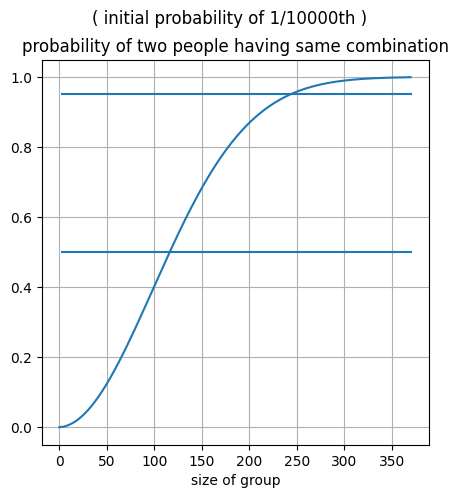

In [14]:
def get_proba(group_size, initial_proba):
    n=len(list(itertools.combinations(range(group_size),2)))
    return (1-(1-initial_proba)**n)

initial_proba = "1/10000" # PIN code

y = []
for i in map(functools.partial(get_proba, initial_proba=eval(initial_proba)), itertools.count(start=2, step=1)):
    if i>0.999:
        break
    y.append(i)

plt.suptitle("( initial probability of %sth )"%initial_proba)
plt.title("probability of two people having same combination")
plt.xlabel("size of group")
plt.plot(y)
plt.grid()
plt.hlines(0.5,2,len(y))
plt.hlines(0.95,2,len(y))

> ⚠️ Be careful when using *iterators*, since they get incremented every time the **next()** function is called on them.

- **closure**

> Python closure is a nested function that allows us to access variables of the outer function even after the outer function is closed.

In [15]:
def fib():
    x0=0
    x1=1
    def get_next_number():
        nonlocal x0, x1
        x0, x1 = x1, x0+x1
        return x1
    return get_next_number

In [16]:
def fib_closure(n):
    f = fib()
    for i in range(2, n+1):
        num = f()
    return num

In [17]:
def fib_recursion(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_recursion(n-1) + fib_recursion(n-2)

In [18]:
%timeit fib_closure(20)

1.73 μs ± 31.2 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [19]:
%timeit fib_recursion(20)

1.25 ms ± 98.9 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [20]:
fib_closure(10000)

3364476487643178326662161200510754331030214846068006390656476997468008144216666236815559551363373402558206533268083615937373479048386526826304089246305643188735454436955982749160660209988418393386465273130008883026923567361313511757929743785441375213052050434770160226475831890652789085515436615958298727968298751063120057542878345321551510387081829896979161312785626503319548714021428753269818796204693609787990035096230229102636813149319527563022783762844154036058440257211433496118002309120828704608892396232883546150577658327125254609359112820392528539343462090424524892940390170623388899108584106518317336043747073790855263176432573399371287193758774689747992630583706574283016163740896917842637862421283525811282051637029808933209990570792006436742620238978311147005407499845925036063356093388383192338678305613643535189213327973290813373264265263398976392272340788292817795358057099369104917547080893184105614632233821746563732124822638309210329770164805472624384237486241145309381220656491403

In [21]:
fib_recursion(10000)

RecursionError: maximum recursion depth exceeded

- **Maximum Gap**

In [22]:
df = pd.read_csv("data/data.csv", sep="|")
ts = list(map(lambda x: x/1000000, df[(df.identifier==36)&(df.hits>1000000)].sort_values(by="day")["hits"].to_list()))[50:]

In [23]:
def get_historical_gap(ts):
    hist_gap=0
    for idx1, elt1 in enumerate(ts):
        for idx2, elt2 in enumerate(ts[idx1+1:]):
            if elt2-elt1>hist_gap:
                hist_gap=elt2-elt1
    return hist_gap

In [24]:
def get_historical_gap_optim(ts):
    hist_gap=0
    hist_min=ts[0]
    idx_max=[]
    idx_min=[]
    for idx, elt in enumerate(ts[1:]):
        if elt>ts[idx-1] and elt-hist_min>hist_gap:
            hist_gap = elt-hist_min
            idx_max.append(idx+1)
            continue
        elif elt<hist_min:
            hist_min=elt
            idx_min.append(idx+1)
    return idx_max[-1], max([idx for idx in idx_min if idx < max(idx_max)]), hist_gap

In [25]:
idx_max, idx_min, gap = get_historical_gap_optim(ts)

In [26]:
print(get_historical_gap(ts))
print(gap)

7.191772
7.191772


In [27]:
%timeit get_historical_gap(ts)

2.72 ms ± 103 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%timeit get_historical_gap_optim(ts)

28.9 μs ± 1.5 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


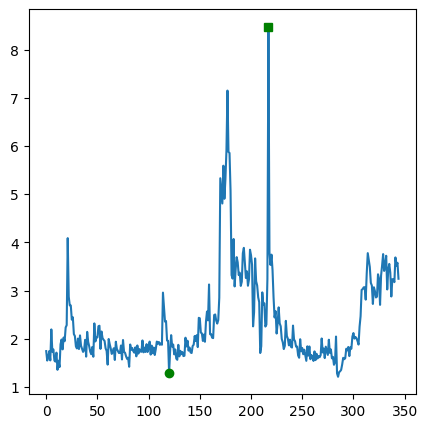

In [29]:
plt.plot(ts)
plt.plot(idx_min,ts[idx_min],'go') 
plt.plot(idx_max,ts[idx_max],'gs') 

- **Apriori**

```python
from apyori import apriori
rules = apriori(data, 
                min_support = 0.0001, 
                min_confidence = 0.5, 
                min_lift = 3, 
                min_length = 2,
                max_length = 10)
rules = list(rules)
```

data = [ transaction$_1$, transaction$_2 \dots$, transaction$_n$] 

where transaction$_i$ = [ product$_1$, product$_2 \dots$, product$_n$ ]

- **❤️**

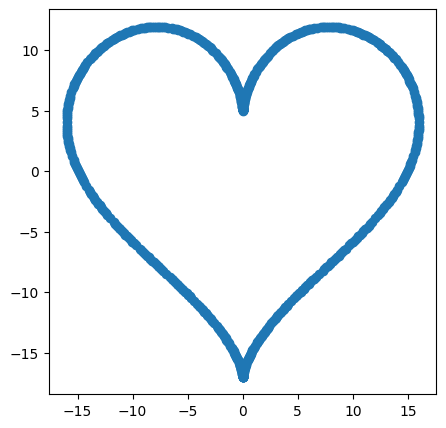

In [30]:
from math import cos, sin
x = [16 * pow(sin(t), 3) for t in range (-314,314)]
y = [13 * cos(t) - 5 * cos(2*t) - 2 * cos(3*t) - cos(4*t) for t in range (-314,314)]
plt.scatter(x,y,)
plt.show()